### Import library 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qiskit
from qiskit import IBMQ


In [2]:
%matplotlib inline
from IPython.display import  display as disp

## Basic Quantum Circuit 

#### Circuit Type 1

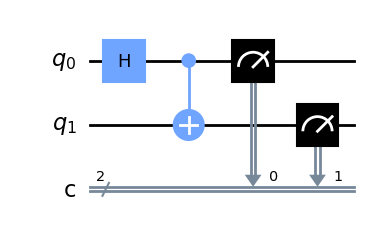

In [3]:
qc = qiskit.QuantumCircuit(2,2)
qc.h(0)         # Hadamard Gate
qc.cx(0,1)      # Controled Not 
# qc.h(0)
qc.measure(range(2), range(2))  # Measurement on classical bit 
qc.draw()

Result(backend_name='qasm_simulator', backend_version='0.12.0', qobj_id='', job_id='f5baff30-74f4-4d17-bb6f-f762df61e73a', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 537, '0x0': 487}), header=QobjExperimentHeader(creg_sizes=[['c', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-88', qreg_sizes=[['q', 2]]), status=DONE, seed_simulator=3297955740, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': True, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'parallel_state_update': 8, 'sample_measure_time': 0.001405442, 'num_qubits': 2, 'device': 'CPU', 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'fusion': {'enabled': False}}, time_taken=0.005301212)], date=2023-03-30T07:39:37.895339, status=COMPLETED, header=None, metadata={'time_taken_execute': 0.005379729, 'mpi_rank': 0, 'num_mpi_processes': 1, 'max_gp

{'11': 537, '00': 487}

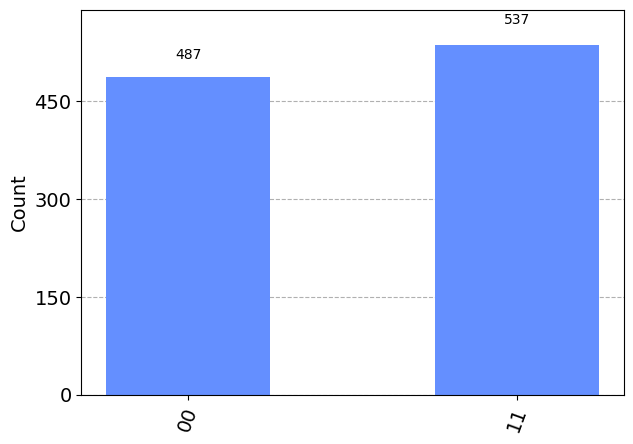

In [4]:
backend_simulator = qiskit.Aer.get_backend('qasm_simulator')
job_simulator = qiskit.execute(qc, backend_simulator, shots=1024)
result = job_simulator.result()
display(result)
count = result.get_counts(qc)
display(count)
qiskit.visualization.plot_histogram(count)

### Circuit Type 2

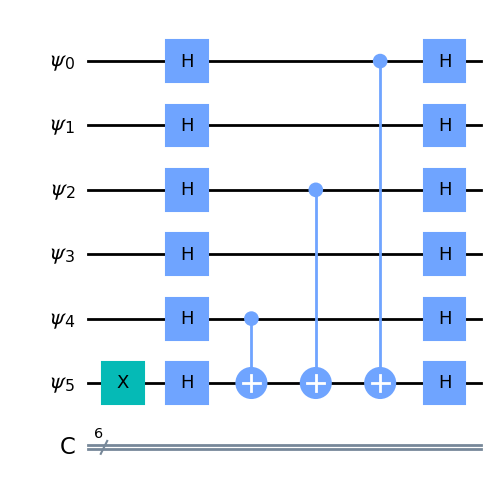

In [5]:
qubits = qiskit.QuantumRegister(6, name = "\mathcal{\psi}")
cbits = qiskit.ClassicalRegister(6,name='C')
circuit = qiskit.QuantumCircuit(qubits, cbits)
circuit.x(5);circuit.barrier();
circuit.h(range(6))
circuit.cx([4,2,0],5)
circuit.barrier()
circuit.h(range(6))
circuit.draw(output = "mpl",plot_barriers = False )

# print(circuit)


### Quantum State Visualization

In [6]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

In [7]:
qc=qiskit.QuantumCircuit(1)
statevector_simulator = qiskit.Aer.get_backend("statevector_simulator")
result = qiskit.execute(qc,statevector_simulator).result()
statevector_result = result.get_statevector(qc)
statevector_result

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


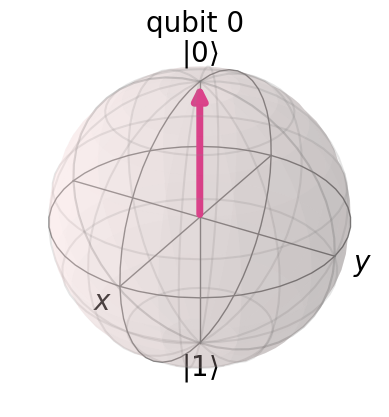

In [8]:
plot_bloch_multivector(statevector_result)

## Execute on real Hardware

In [13]:
# Loading your IBM Quantum account(s)
IBMQ.load_account()
provider=IBMQ.get_provider()
provider.backends()
backend = provider.get_backend('ibmq_quito')

Traceback (most recent call last):
  Cell In[13], line 2
    IBMQ.load_account()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/ibmqfactory.py:191 in load_account
    self._initialize_providers(credentials, preferences)
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/ibmqfactory.py:456 in _initialize_providers
    auth_client = AuthClient(credentials.token,
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/api/clients/auth.py:41 in __init__
    self.base_api = self._init_service_clients(**request_kwargs)
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/api/clients/auth.py:53 in _init_service_clients
    access_token = self._request_access_token()
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/api/clients/auth.py:75 in _request_access_token
    response = self.auth_api.login(self.api_token)
  File /opt/conda/lib/python3.10/site-packages/qiskit/providers/ibmq/api/rest/root.py:125 in lo

In [14]:
job_simulator = qiskit.execute(qc, backend, shots=1024)
result = job_simulator.result()
count = result.get_counts(qc)
count

Traceback (most recent call last):
  Cell In[14], line 1
    job_simulator = qiskit.execute(qc, backend, shots=1024)
NameError: name 'backend' is not defined

Use %tb to get the full traceback.
